<a href="https://colab.research.google.com/github/thaleson/Aprendizado_com_Reforco/blob/main/Aprendizagem_por_Refor%C3%A7o_com_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizagem por Reforço com Q-Learning

- Código adaptado de: https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

In [1]:
!pip uninstall gym

Found existing installation: gym 0.25.2
Uninstalling gym-0.25.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/gym-0.25.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/gym/*
Proceed (Y/n)? y
  Successfully uninstalled gym-0.25.2


In [2]:
!pip install gym==0.15.7 # Use esta versão para conseguir visualizar o ambiente

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.4 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.15.7-py3-none-any.whl size=1648805 sha256=0e2d6fc77cd94aa315e5b0c5076176b19261fb12576cd038b32b9b94de8c9736
  Stored in directory: /root/.cache/pip/wheels/09/34/69/e1c9061afff9529cff995b1861b5e88c31b845dbb28ea1c9d6
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.6.0 requires cloudpickle>=2.0.0, but you have cloudpickle 1.2.2 which is incompatible.
dask 2023.8.1 requires cloudpickle>=1.5.0, but you have cloudpickle 1.2.2 which

## Entendimento do ambiente

In [3]:
import gym
import random
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [4]:
env = gym.make('Taxi-v3')

In [21]:
env.reset()

67

In [20]:
env.render('human')

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [7]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [8]:
# 0 = south 1 = north 2 = east 3 = west 4 = pickup 5 = dropoff
print(env.action_space)

Discrete(6)


In [9]:
#5*5*5*4 -- Atualizado 22/11/2022 ref. https://www.gymlibrary.dev/environments/toy_text/taxi/#observations
25*5*4

500

In [10]:
# 4 destinos do táxi
print(env.observation_space)

Discrete(500)


In [11]:
len(env.P)

500

In [12]:
env.P[484]

{0: [(1.0, 484, -1, False)],
 1: [(1.0, 384, -1, False)],
 2: [(1.0, 484, -1, False)],
 3: [(1.0, 464, -1, False)],
 4: [(1.0, 484, -10, False)],
 5: [(1.0, 484, -10, False)]}

## Treinamento

Diferença temporal (Q-learning)

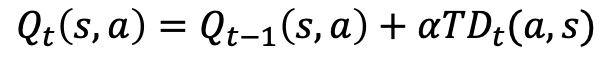

In [ ]:
random.uniform(0, 1)

0.35171589313437146

In [ ]:
env.action_space

Discrete(6)

In [13]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table.shape

(500, 6)

**Este código cria e exibe uma matriz q_table que armazena os valores Q para cada par de estado-ação. Aqui estão os principais pontos**

In [14]:
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [33]:
# Cria um array numpy com os elementos 3 e 5
array = np.array([3, 5])

# Retorna o índice do maior elemento no array
indice_maior_elemento = np.argmax(array)

# Exibe o índice do maior elemento
print("O índice do maior elemento no array é:", indice_maior_elemento)


O índice do maior elemento no array é: 1


# **Definindo os parâmetros do algoritmo**

In [ ]:
alpha = 0.1  # Taxa de aprendizado
gamma = 0.6  # Fator de desconto
epsilon = 0.1  # Taxa de exploração

# Laço principal de treinamento
for i in range(100000):
    # Resetando o ambiente para o início de um novo episódio
    estado = env.reset()

    penalidades, recompensa = 0, 0
    done = False

    # Executando o episódio até o término
    while not done:
        # Selecionando uma ação com base na estratégia de exploração/exploitation
        if random.uniform(0, 1) < epsilon:
            acao = env.action_space.sample()  # Exploração
        else:
            acao = np.argmax(q_table[estado])  # Exploitation

        # Executando a ação no ambiente e observando o próximo estado e recompensa
        proximo_estado, recompensa, done, info = env.step(acao)

        # Atualizando a função Q
        q_antigo = q_table[estado, acao]
        proximo_maximo = np.max(q_table[proximo_estado])
        q_novo = (1 - alpha) * q_antigo + alpha * (recompensa + gamma * proximo_maximo)
        q_table[estado, acao] = q_novo

        # Contabilizando penalidades (se houver)
        if recompensa == -10:
            penalidades += 1

        estado = proximo_estado  # Atualizando o estado atual para o próximo estado

    # Exibindo o progresso a cada 100 episódios
    if i % 100 == 0:
        clear_output(wait=True)
        print('Episódio: ', i)

# Informando que o treinamento foi concluído
print('Treinamento concluído')


In [36]:
# Índice específico da q_table a ser consultado
indice_estado = 346

# Consultando a linha correspondente ao estado específico na q_table
valores_q_estado = q_table[indice_estado]

# Exibindo os valores Q para o estado específico
print("Valores Q para o estado", indice_estado, ":")
print(valores_q_estado)


Valores Q para o estado 346 :
[ -2.4930175   -2.48236806  -2.48830021  -2.49267335 -10.61949479
 -11.13475012]


In [23]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [24]:
env.step(1)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [25]:
env.step(1)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [26]:
env.encode(3, 2, 1, 2)

346

## Avaliação

In [37]:
total_penalidades = 0  # Inicializa o contador de penalidades
episodios = 50  # Número de episódios a serem executados
frames = []  # Lista para armazenar informações sobre cada etapa do episódio

# Loop sobre os episódios
for _ in range(episodios):
    estado = env.reset()  # Reinicia o ambiente e obtém o estado inicial
    penalidades, recompensa = 0, 0  # Inicializa os contadores de penalidades e recompensas
    done = False  # Inicializa a variável que indica se o episódio está completo

    # Loop até o episódio ser concluído
    while not done:
        acao = np.argmax(q_table[estado])  # Escolhe a ação com base nos valores Q
        estado, recompensa, done, info = env.step(acao)  # Executa a ação e obtém o próximo estado, recompensa e se o episódio está completo

        if recompensa == -10:  # Verifica se houve penalidade
            penalidades += 1  # Incrementa o contador de penalidades

        # Armazena informações sobre a etapa atual do episódio
        frames.append({
            'frame': env.render(mode='ansi'),  # Representação do ambiente em formato de texto
            'state': estado,  # Estado atual
            'action': acao,  # Ação executada
            'reward': recompensa  # Recompensa obtida
        })

    total_penalidades += penalidades  # Acumula o número total de penalidades durante todos os episódios

# Exibe informações sobre o treinamento
print('Episódios:', episodios)
print('Penalidades:', total_penalidades)


Episódios: 50
Penalidades: 0


In [ ]:
from time import sleep  # Importa a função sleep do módulo time

# Loop sobre cada etapa do episódio armazenada em frames
for frame in frames:
    clear_output(wait=True)  # Limpa a saída para exibir apenas o próximo frame
    print(frame['frame'])  # Imprime a representação do ambiente em formato de texto
    print('Estado:', frame['state'])  # Imprime o estado atual
    print('Ação:', frame['action'])  # Imprime a ação executada
    print('Recompensa:', frame['reward'])  # Imprime a recompensa obtida
    sleep(0.5)  # Aguarda 0.5 segundos antes de exibir o próximo frame


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Estado: 0
Ação: 5
Recompensa: 20
